# 미니 프로젝트 7팀
## 교통사고 데이터 분석 및 시각화

## 1. 소개
[공공 데이터 포털](https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=&detailKeyword=&publicDataPk=&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=inqireCo&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=)에서 제공하는 교통 사고 관련 데이터를 분석화하고 시각화 해본 프로젝트

## 2. 이용 데이터
- [도로교통공단_교통사고 사망 정보]()
- [도로교통공단_시간대별 교통사고 통계 API]()
- [도로교통공단_지자체별 대상사고통계정보 조회 서비스]()
- [도로교통공단_사고유형별 교통사고 통계](https://www.data.go.kr/data/15070282/fileData.do)
- [도로교통공단_가해운전자 연령층별 월별 교통사고 통계](https://www.data.go.kr/data/15070199/fileData.do)
- [도로교통공단_월별 교통사고 통계](https://www.data.go.kr/data/15070315/fileData.do)
- [도로교통공단_사상자 연령층별 성별 교통사고 통계](https://www.data.go.kr/data/15070293/fileData.do)
- [도로교통공단_부문별_노인_교통사고]()
- [도로교통공단_부문별_어린이_교통사고]()
- [서울특별시 구별 인구밀도]()

5년간 교통사고 통계 데이터와 2020년 월별 교통사고 통계 데이터, 2018년 취약계층 교통사고 통계 데이터를 이용

## 3. 목표
1. 각각의 데이터 셋에 대한 분석 및 시각화
2. 연관성에 따른 데이터 분류
3. EDA 실습 및 피드백

## 4. 구현
### 1. 라이브러리

In [97]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import chart_studio as cs

In [22]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = "retina"

### 2. 연간 교통사고 통계 데이터 (최근 5년간)


#### Data load

In [87]:
# csv
df_01 = pd.read_csv("data/도로교통공단_사망 교통사고 정보_20170111.csv", encoding="cp949")

In [50]:
# api
# 도로교통공단_지자체별 대상사고통계정보 조회 서비스
# 부문별 교통사고 통계(보행자사고, 어린이사고, 고령자사고 등 13종)에 대한 전국 지자체별 교통사고 통계 조회 서비스
def siDo_acc(year, siDo, pageNo):
    # url
    url = 'http://apis.data.go.kr/B552061/lgStat/getRestLgStat'
    # API key 인증하기
    params ={'serviceKey': 'api key', 
             'searchYearCd': year, 
             'siDo': siDo, 
             'guGun': '',
             'type': 'xml', 
             'numOfRows': '1000', 
             'pageNo': pageNo
            }

    # API 서버의 주소로 요청을 보내 응답받은 내용을 response 변수에 담는다
    response = requests.get(url, params=params)

    # # xml 내용
    html = bs(response.text, 'lxml')

    rows = html.select('item')

    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i == 0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list=[]
    df = pd.DataFrame(row_list, columns=name_list)
    
    
    return df


In [51]:
df_seoul_2021 = siDo_acc(2021, 1100, 1)
df_seoul_2020 = siDo_acc(2020, 1100, 1)
df_seoul_2019 = siDo_acc(2019, 1100, 1)
df_seoul_2018 = siDo_acc(2018, 1100, 1)
df_seoul_2017 = siDo_acc(2017, 1100, 1)
df_seoul_2016 = siDo_acc(2016, 1100, 1)

df_seoul = pd.concat([df_seoul_2021, df_seoul_2020, df_seoul_2019,\
                      df_seoul_2018,df_seoul_2017, df_seoul_2016])

In [52]:
df_seoul = df_seoul.rename(columns={ 'std_year': '기준년도',
                                     'acc_cl_nm': '사고분류명',
                                     'sido_sgg_nm': '시도시군구명',
                                     'acc_cnt': '사고건수',
                                     'acc_cnt_cmrt': '사고건수구성비',
                                     'dth_dnv_cnt': '사망자수',
                                     'dth_dnv_cnt_cmrt': '사망자수구성비', 
                                     'ftlt_rate': '치사율', 
                                     'injpsn_cnt': '부상자수',
                                     'injpsn_cnt_cmrt': '부상자수구성비', 
                                     'tot_acc_cnt': '총사건건수', 
                                     'tot_dth_dnv_cnt': '총사망자수', 
                                     'tot_injpsn_cnt': '총부상자수',
                                     'pop_100k': '인구 10만명당 사고건수',
                                     'car_10k': '자동차1만대당 사고건수',
                                     'cnt_027_01': '과속 사고건수', 
                                     'cnt_027_02': '중앙선침범 사고건수', 
                                     'cnt_027_03': '신호위반 사고건수',       
                                     'cnt_027_04': '안전거리미확보 사고건수', 
                                     'cnt_027_05': '안전운전의무불이행 사고건수', 
                                     'cnt_027_06': '교차로통행방법위반 사고건수', 
                                     'cnt_027_07': '보행자보호의무위반 사고건수', 
                                     'cnt_027_99': '기타 사고건수',
                                     'cnt_014_01': '차대사람 사고건수',
                                     'cnt_014_02': '차대사 사고건수', 
                                     'cnt_014_03': '차량단독 사고건수', 
                                     'cnt_014_04': '철길건널목 사고건수'
                                    })

# Dtype int타입으로 타입변경
df_seoul[['기준년도', '사고건수', '사망자수', '부상자수', '총사건건수', '총사망자수', '총부상자수']] = df_seoul[['기준년도', '사고건수', '사망자수', '부상자수', '총사건건수', '총사망자수', '총부상자수']].astype(int)


# Dtype float타입으로 타입변경
df_seoul[['사고건수구성비', '사망자수구성비', '치사율', '부상자수구성비']] = df_seoul[['사고건수구성비', '사망자수구성비', '치사율', '부상자수구성비']].astype(float)
df_seoul[['인구 10만명당 사고건수', '자동차1만대당 사고건수']] = df_seoul[['인구 10만명당 사고건수', '자동차1만대당 사고건수']].astype(float)



#### df_seoul의 테이블 분류

In [53]:
df_seoul = df_seoul.drop(columns=['인구 10만명당 사고건수',
                                  '자동차1만대당 사고건수',
                                  '과속 사고건수',
                                  '중앙선침범 사고건수',
                                  '신호위반 사고건수',
                                  '안전거리미확보 사고건수',
                                  '안전운전의무불이행 사고건수',
                                  '교차로통행방법위반 사고건수',
                                  '보행자보호의무위반 사고건수',
                                  '기타 사고건수',
                                  '차대사람 사고건수',
                                  '차대사 사고건수',
                                  '차량단독 사고건수',
                                  '철길건널목 사고건수'])

In [54]:
df_seoul.sample(5)

,기준년도,사고분류명,시도시군구명,사고건수,사고건수구성비,사망자수,사망자수구성비,치사율,부상자수,부상자수구성비,총사건건수,총사망자수,총부상자수
309,2021,뺑소니사고,서울특별시 종로구,20,0.27,1,1.02,5.00,24,0.23,7492,98,10230
241,2018,전체사고,서울특별시 양천구,1428,0.66,11,0.29,0.77,1939,0.60,217148,3781,323037
8,2021,고령운전자사고,서울특별시,5371,16.87,50,7.05,0.93,6986,15.62,31841,709,44713
74,2018,개인이동수단(PM)사고,서울특별시 관악구,1,0.44,0,0.00,0.00,1,0.42,225,4,238
221,2021,전체사고,서울특별시 성북구,1285,0.63,15,0.51,1.17,1606,0.55,203130,2916,291608


#### 연도별 전체사고 (2016 ~ 2021년)

In [20]:
df_seoul_sum = df_seoul[(df_seoul['사고분류명'] == '전체사고') & (df_seoul['시도시군구명'] == '서울특별시')]
df_seoul_sum = df_seoul_sum.sort_values(by=['기준년도'])
df_seoul_sum.sample(5)

,기준년도,사고분류명,시도시군구명,사고건수,사고건수구성비,사망자수,사망자수구성비,치사율,부상자수,부상자수구성비,총사건건수,총사망자수,총부상자수
0,2020,전체사고,서울특별시,35227,16.80,219,7.11,0.62,47513,15.52,209654,3081,306194
0,2021,전체사고,서울특별시,33913,16.70,243,8.33,0.72,45223,15.51,203130,2916,291608
0,2016,전체사고,서울특별시,40039,18.12,348,8.11,0.87,55669,16.78,220917,4292,331720
0,2018,전체사고,서울특별시,38795,17.87,304,8.04,0.78,53751,16.64,217148,3781,323037
0,2019,전체사고,서울특별시,39258,17.10,250,7.46,0.64,53904,15.77,229600,3349,341712


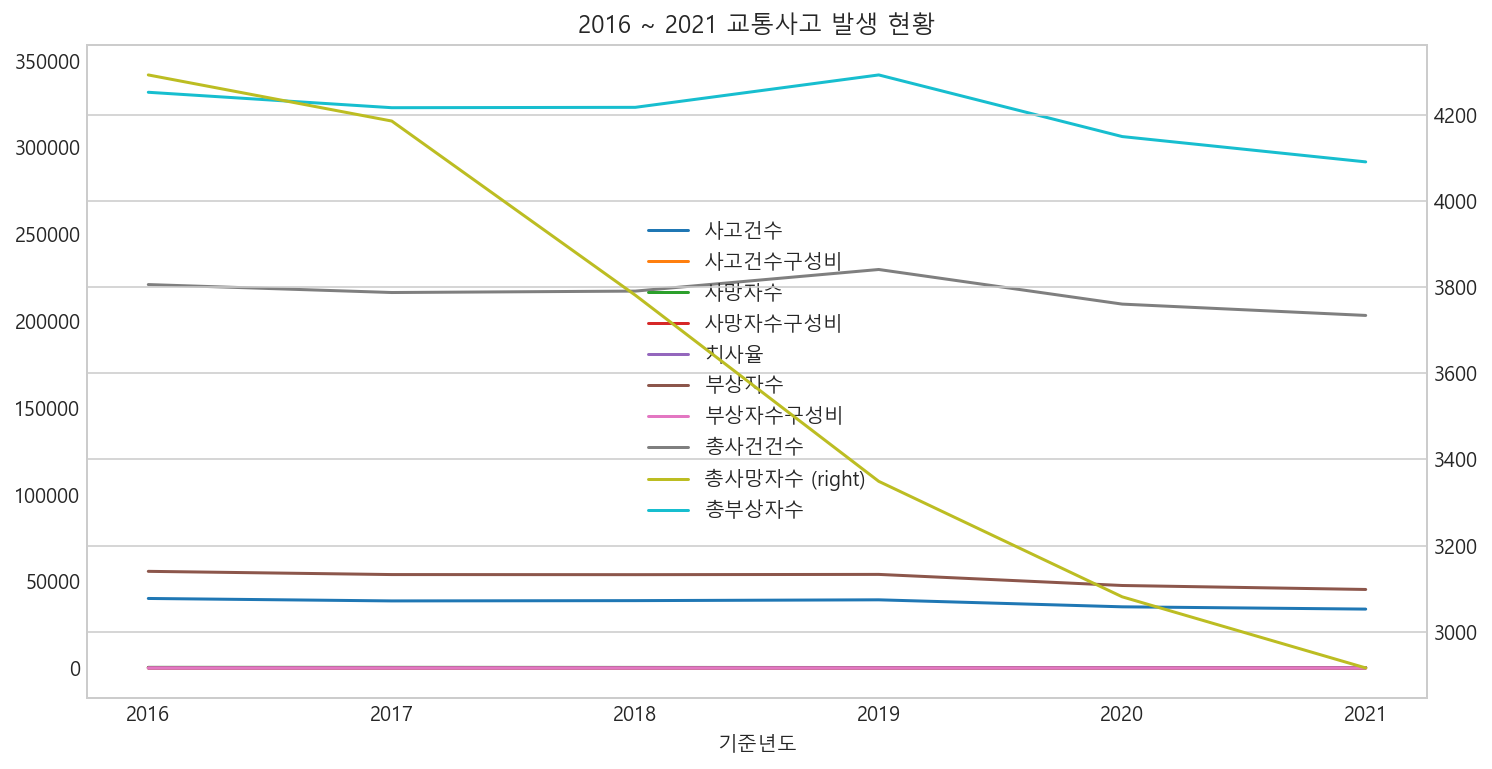

In [30]:
_ = df_seoul_sum.plot(x='기준년도', rot=0, figsize=(12, 6), secondary_y='총사망자수', title="2016 ~ 2021 교통사고 발생 현황")

#### 연도별 사망자수 추이 (2012 ~ 2014년)

In [25]:
df_totaldead = df_01.groupby('발생년')['사망자수'].count()
df_totaldead

발생년
2012    5165
2013    4876
2014    4583
Name: 사망자수, dtype: int64

In [98]:
fig = px.bar(df_totaldead, title= ' 2012 ~ 2014 사망자 수')
fig.show()
cs.tools.get_embed(cs.plotly.plot(fig, filename="2012~2014 사망자수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/38.embed" height="525" width="100%"></iframe>'

In [99]:
fig = px.bar(df_seoul_sum, x="기준년도", y="총사망자수", title="2016 ~ 2021 사망자 수")
fig.show()
cs.tools.get_embed(cs.plotly.plot(fig, filename="파일 이름", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/40.embed" height="525" width="100%"></iframe>'

근 10년간, 연간 사망자 수가 감소하는 추이를 확인 할 수 있음

#### 교통사고 유형

In [100]:
df_typeofincidents =df_01.groupby('사고유형')['발생년월일시'].count()
df_typeofincidents2=pd.crosstab(df_01.사고유형, df_01.발생년).T
df_typeofincidents3=df_typeofincidents2.drop(columns=["직전진행","경보기 무시","차단기돌파","주/정차차량 충돌"]).T

fig = px.bar(df_typeofincidents3.sort_index(), title="2012 ~ 2014 사고 유형")
cs.tools.get_embed(cs.plotly.plot(fig, filename="사고 유형", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/42.embed" height="525" width="100%"></iframe>'

#### 교통사고 분류

In [101]:
fig = px.bar(df_seoul, x='사고분류명', y='사고건수', color='사고건수', facet_col_wrap=1, height=500, title="2016 ~ 2021 사고분류")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="사고 분류", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/44.embed" height="525" width="100%"></iframe>'

야간사고 > 보행자사고 > 고령자사고 > 고령운전자사고 순으로 사고가 일어나며, 서울특별시의 5년간 가장 많은 사고가 일어난 것은 `야간사고`임

#### 사고유형 별 사망자 수

In [102]:
df_wholeperiodofincidents=df_typeofincidents3.T.sum()
fig = px.bar(df_wholeperiodofincidents, title = "2012 ~ 2014, 사고 유형별 사망자수")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="사고 유형별 사망자수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/46.embed" height="525" width="100%"></iframe>'

횡단중 사고가 발생해 사망하는 사례가 가장 많았음

#### 시간대별 사고 발생

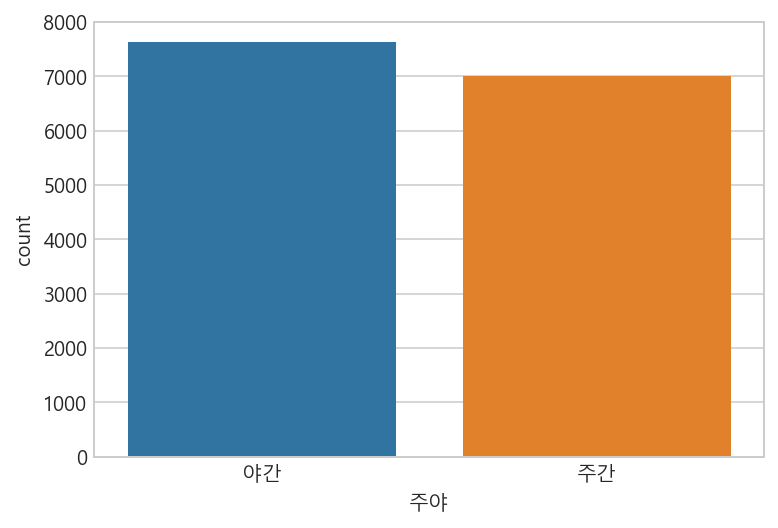

In [45]:
df_happeningtime = df_01.groupby('주야')['발생년월일시'].count()
_ = sns.countplot(data= df_01, x='주야')

### 3. 2020년도 교통사고 통계 데이터
#### Data load

In [56]:
# 사고 유형별 교통사고 통계
df_accident_type = pd.read_csv("data/도로교통공단_사고유형별 교통사고 통계_20201231.csv", encoding="cp949")
# 가해 운전자 연령층별 월별 교통하고 통계
df_age_agg_driver_month = pd.read_csv("data/도로교통공단_가해운전자 연령층별 월별 교통사고 통계_12_31_2020.csv", encoding="cp949")
# 월별 교통하고 통계
df_monthly = pd.read_csv("data/도로교통공단_월별 교통사고 통계_20201231.csv", encoding="cp949")
# 사상자 연령층별 성별 교통하고 통계
df_age_gender = pd.read_csv("data/도로교통공단_사상자 연령층별 성별 교통사고 통계_20201231.csv", encoding="cp949")

#### 2020년 사고 유형별 부상자 수

In [103]:
fig = px.bar(df_accident_type, x="사고유형", y=["사망자수", "중상자수", "경상자수", "부상신고자수"], title="2020년 사고유형별 부상자 수")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="사고 유형별 부상자 수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/26.embed" height="525" width="100%"></iframe>'

2020년도에는, 측면 충돌로 인한 사고가 가장 많이 발생

#### 가해자 연령별 사고 건수

In [104]:
fig = px.bar(df_age_agg_driver_month, x="가해자연령층", y="사고건수", title="2020년 가해자 연령별 사고 건수")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="가해자 연령별 사고 건수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/28.embed" height="525" width="100%"></iframe>'

2020년도, 가해자 중에는 51~60세가 가장 많았고, 예상보다 고령 운전자의 사고 건수가 적음

#### 월별 사고 건수

In [105]:
fig = px.bar(df_age_agg_driver_month, x="발생월", y="사고건수", color="가해자연령층", title="월별 사고 건수")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="월별 사고 건수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/30.embed" height="525" width="100%"></iframe>'

In [106]:
fig = px.bar(df_monthly, x="발생월", y="사고건수", title="월별 사고 건수")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="월별 사고 건수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/30.embed" height="525" width="100%"></iframe>'

In [107]:
fig = px.line(df_age_agg_driver_month, x="발생월", y="사고건수", facet_col="가해자연령층", color="가해자연령층", title="가해 연령층 별 월별 사고건수")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="가해 연령층 별 월별 사고건수", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/52.embed" height="525" width="100%"></iframe>'

#### 사상자 연령층

In [108]:
fig = px.bar(df_age_gender, x="사상자연령층", y=["사망자수", "중상자수", "경상자수", "부상신고자수"], color="사상자성별", title="사상자 연령층")
fig.show()

cs.tools.get_embed(cs.plotly.plot(fig, filename="사상자 연령층", auto_open=False))

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~nuyhc/35.embed" height="525" width="100%"></iframe>'

연령대별 사장자 중에, 남성이 과반수 이상임

### 4. 2021년 시간별 교통사고 데이터
#### Data load

In [69]:
def json_traffic_accidents_by_time(page):
    apikey = 'api key'
    url = f'http://api.odcloud.kr/api/15087037/v1/uddi:940aa4e0-132a-40bf-9c5c-92e107944b38?page={page}&perPage=10&serviceKey={apikey}'
    # API 서버의 주소로 요청을 보내 응답받은 내용을 response 변수에 담는다
    response = requests.get(url)
    json_traffic_accident = response.json()
    return json_traffic_accident

json_tabyt1 = json_traffic_accidents_by_time(1)
json_tabyt2 = json_traffic_accidents_by_time(2)

def json_traffic_accidents_by_time(page):
    apikey = 'api key'
    url = f'http://api.odcloud.kr/api/15087037/v1/uddi:940aa4e0-132a-40bf-9c5c-92e107944b38?page={page}&perPage=10&serviceKey={apikey}'
    # API 서버의 주소로 요청을 보내 응답받은 내용을 response 변수에 담는다
    response = requests.get(url)
    json_traffic_accident = response.json()
    return json_traffic_accident

json_tabyt1 = json_traffic_accidents_by_time(1)
json_tabyt2 = json_traffic_accidents_by_time(2)

# json_tabyt1, json_tabyt2을 DataFrame으로 만듭니다.
df_tabyt1 = pd.DataFrame(json_tabyt1['data'])
df_dabyt2 = pd.DataFrame(json_tabyt2['data'])

# concat한 DataFrame의 인덱스 순서 다시 정렬
df = pd.concat((df_tabyt1, df_dabyt2), axis=0)
# "시간대" 컬럼으로 지정
df = df.set_index("시간대")

In [91]:
# json_tabyt1, json_tabyt2을 DataFrame으로 만듭니다.
df_tabyt1 = pd.DataFrame(json_tabyt1['data'])
df_dabyt2 = pd.DataFrame(json_tabyt2['data'])

# concat한 DataFrame의 인덱스 순서 다시 정렬
df = pd.concat((df_tabyt1, df_dabyt2), axis=0)
# "시간대" 컬럼으로 지정
df = df.set_index("시간대")

#### 시간대별 사고건 수

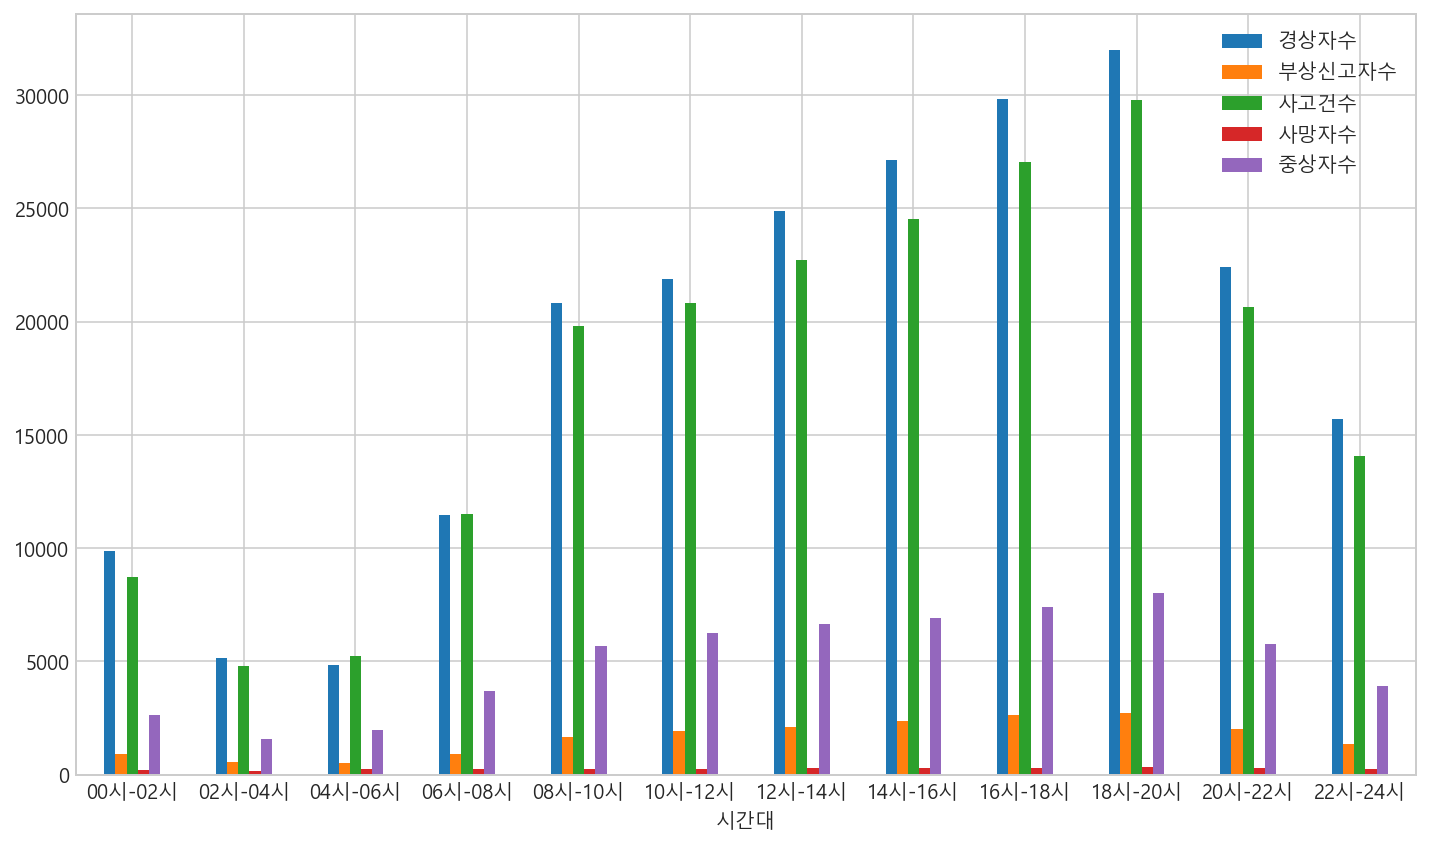

In [71]:
_ = df.plot.bar(figsize=(12, 7), rot=0)

시간대는 18~20시 사이에 가장 높은 사고건수를 보이고 있음

### 5. 취약층(노인, 어린이 한정) 교통사고 발생현황 (2018년)

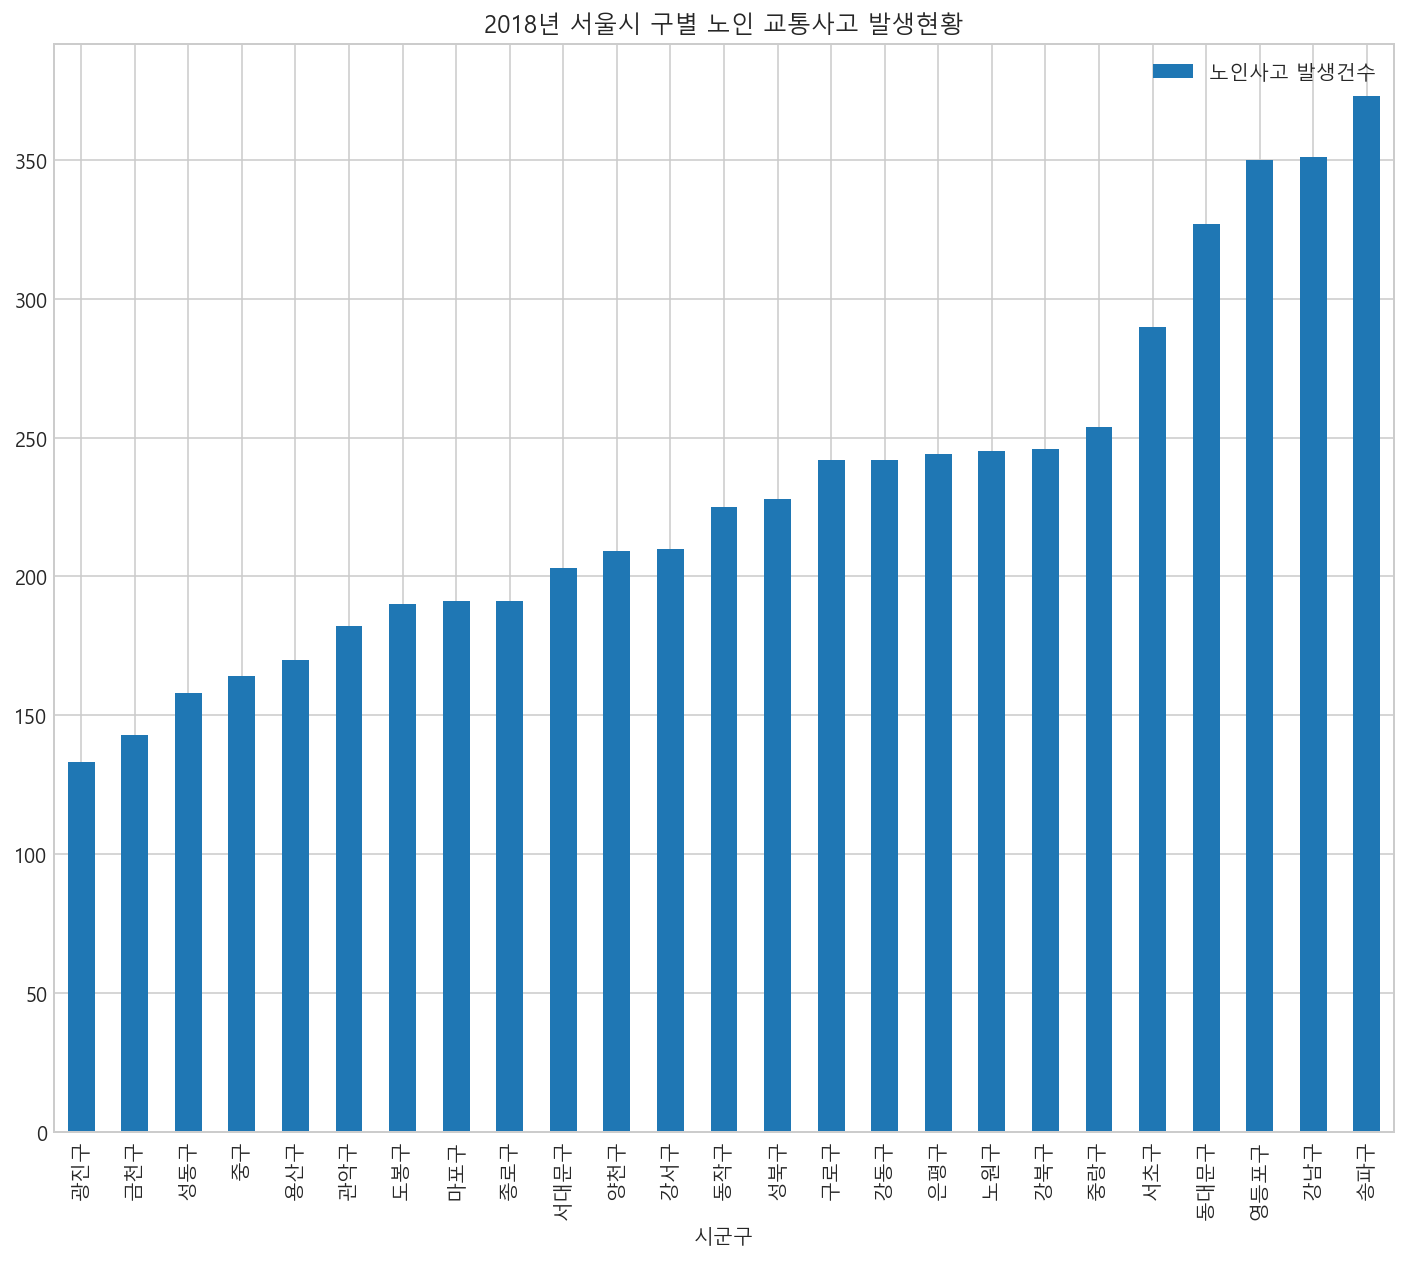

In [77]:
df_old_temp = pd.read_csv("data/도로교통공단_부문별_노인_교통사고_20181231.csv", encoding="CP949")
df_old = df_old_temp.loc[df_old_temp["시도"]=="서울", ["시군구", "발생건수"]].sort_values("발생건수")
df_old.columns = ["시군구", "노인사고 발생건수"]
df_old = df_old.set_index("시군구")

_ = df_old.plot(kind="bar", figsize=(12,10), title="2018년 서울시 구별 노인 교통사고 발생현황")

노인 교통사고 발생건수는 가장 많은 구는 송파구, 강남구, 영등포구, 동대문구, 서초구, 중랑구, 강북구 순으로 나타남  
서울시 내 인구수가 많은 송파구가 노인 교통사고가 가장 많음

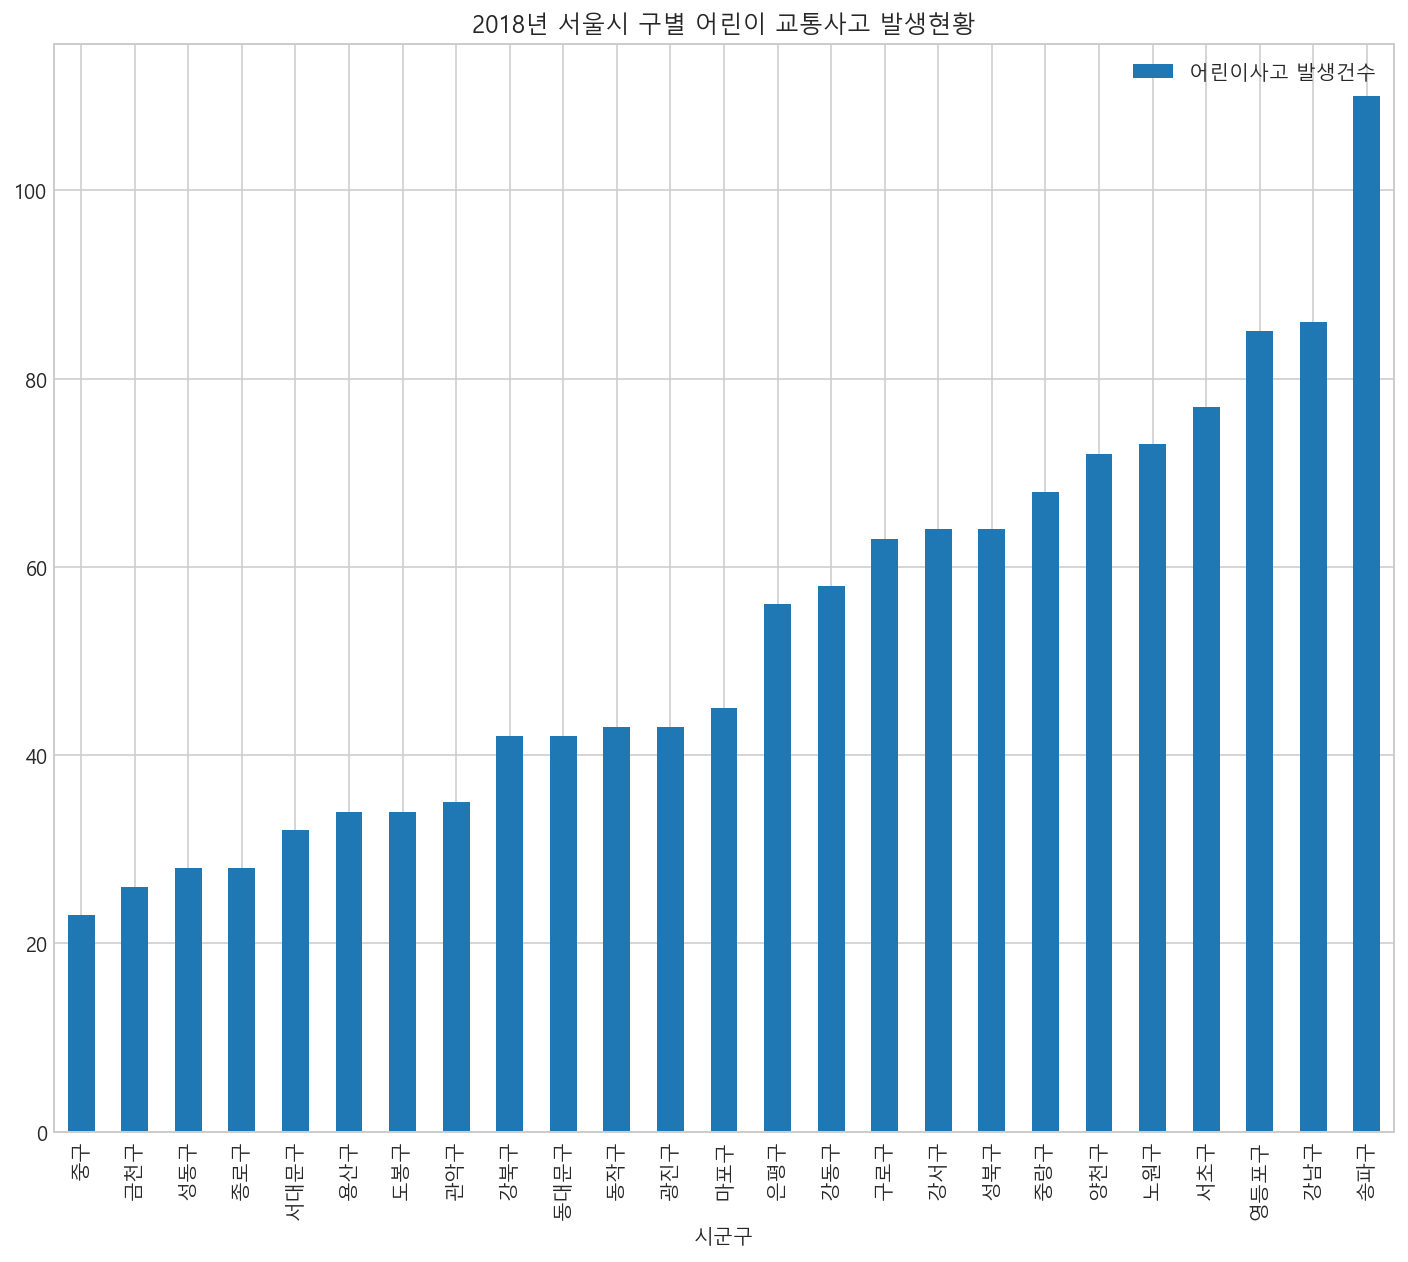

In [79]:
df_child_temp = pd.read_csv("data/도로교통공단_부문별_어린이_교통사고_20181231.csv", encoding="CP949")
df_child = df_child_temp.loc[df_child_temp["시도"]=="서울", ["시군구", "발생건수"]].sort_values("발생건수")
df_child.columns = ["시군구", "어린이사고 발생건수"]
df_child = df_child.set_index("시군구")

_ = df_child.plot(kind="bar", figsize=(12,10), title="2018년 서울시 구별 어린이 교통사고 발생현황")

어린이 교통사고도 송파구에서 많이 발생하였음  
어린이 교통사고 발생현황도 도로교통공단 부분별 노인 교통사고 통계(2018)을 사용하여 일관성 유지  
어린이 교통사고 발생건수는 가장 많은 구 순으로 송파구, 강남구, 영등포구, 서초구, 노원구, 양천구, 중랑구 순

#### 서울시 구별 인구밀도 데이터와 직접 비교

In [81]:
# 서울시 인구 데이터 자료 가져오기 및 전처리(인덱스 맞추기)
df_population_desity = pd.read_csv("data/서울특별시 구별 인구밀도.csv")
df_population_desity.columns = ["시군구", "인구", "면적", "인구밀도"]
df_population_desity = df_population_desity.sort_values("시군구")
df_population_desity = df_population_desity.set_index("시군구")
df_population_desity.head()
# 문자열로 되어있는 인구와 인구밀도 칼럼을 int형으로 변경
df_population_desity["인구"] = df_population_desity["인구"].str.replace(',', '').astype('int64')
df_population_desity["인구밀도"] = df_population_desity["인구밀도"].str.replace(',', '').astype('int64')

# 인구수 순으로 정렬
df_population_desity.sort_values("인구").tail(7)

,인구,면적,인구밀도
시군구,,,
은평구,487666,29.71,16415
관악구,520040,29.57,17587
강남구,547453,39.50,13859
노원구,548160,35.44,15468
강서구,603611,41.44,14567
송파구,673507,33.87,19883
합계,10049607,605.24,16604


* 인구수가 많은 순으로 송파구, 강서구, 노원구, 강남구, 관악구, 은평구, 양천구 순으로 나타남
    * 노인 교통사고가 많이 발생하는 구는 송파구, 강남구, 영등포구, 동대문구, 서초구, 중랑구, 강북구 순으로 인구수 순서와 일부 다름
    * 어린이 교통사고가 많이 발생하는 구는 송파구, 강남구, 영등포구, 서초구, 노원구, 양천구, 중랑구 순으로 인구수 순서와 일부 다름

실제 인구수 데이터와 비교결과, 인구수 외 다른 변수가 영향 준다는 것을 짐작 가능

#### 인구수 및 교통사고 데이터를 합쳐 시각화

In [83]:
df = pd.concat([df_old, df_child, df_population_desity], axis=1).dropna()
df

,노인사고 발생건수,어린이사고 발생건수,인구,면적,인구밀도
시군구,,,,,
광진구,133.0,43.0,371063,17.06,21746
금천구,143.0,26.0,254021,13.02,19510
성동구,158.0,28.0,316463,16.86,18771
중구,164.0,23.0,135633,9.96,13618
용산구,170.0,34.0,245090,21.87,11209
관악구,182.0,35.0,520040,29.57,17587
도봉구,190.0,34.0,341649,20.67,16531
마포구,191.0,45.0,386359,23.85,16199
종로구,191.0,28.0,163026,23.91,6817


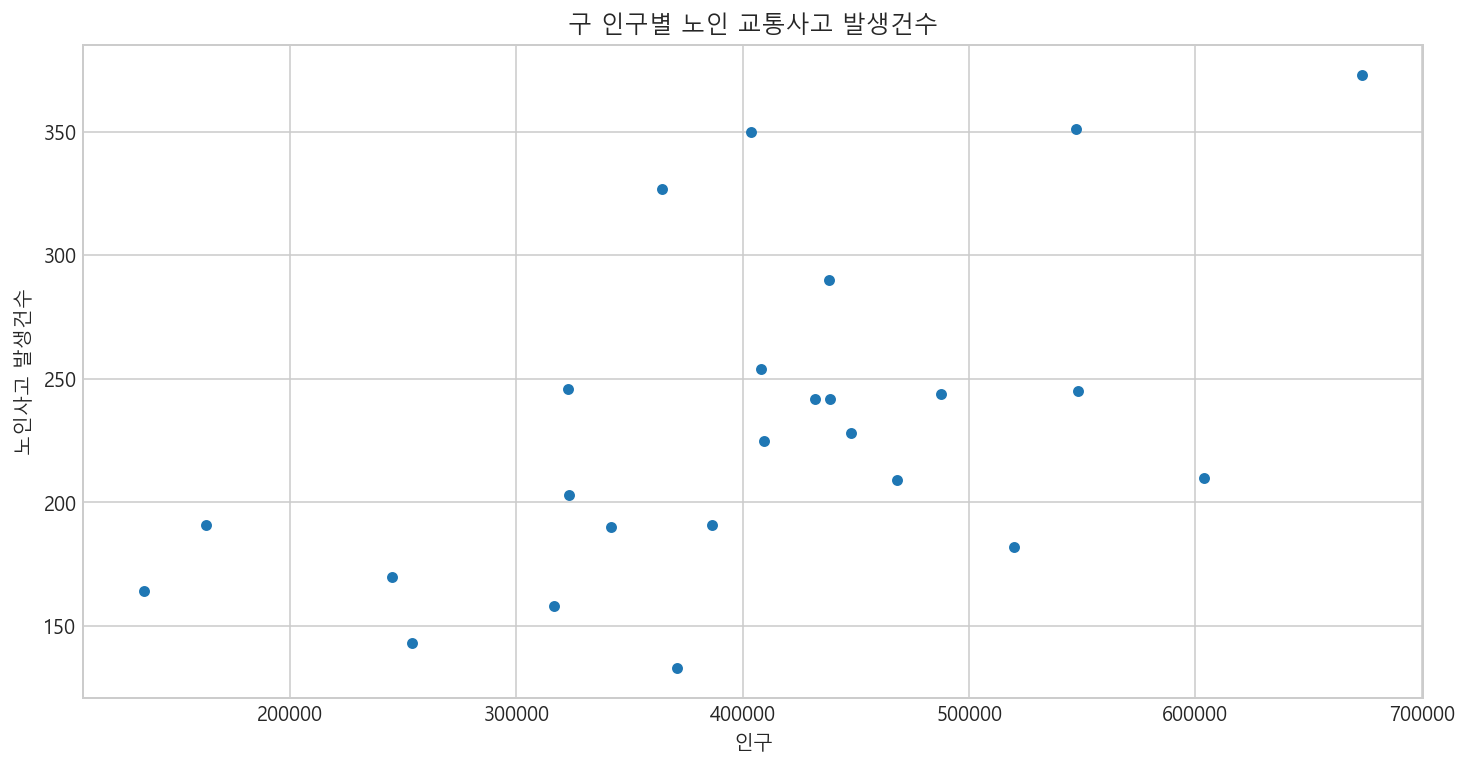

In [84]:
_ = df.plot.scatter(x="인구", y="노인사고 발생건수", figsize=(12,6), title="구 인구별 노인 교통사고 발생건수")

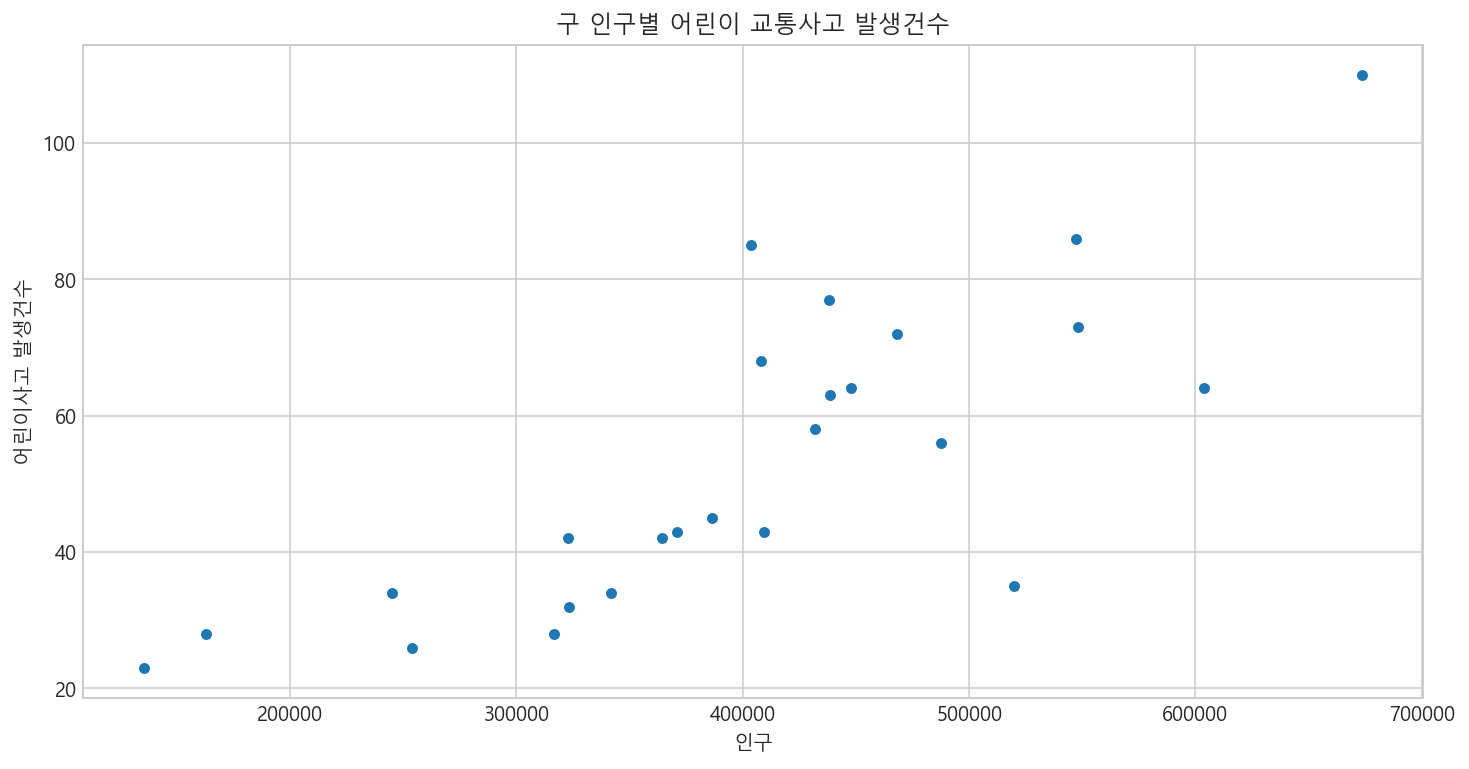

In [86]:
_ = df.plot.scatter(x="인구", y="어린이사고 발생건수", figsize=(12,6), title="구 인구별 어린이 교통사고 발생건수")

서울시의 각 구별 취약계층 교통사고 발생건수를 각 구별 인구수와 비교한 결과, 인구수가 많을수록 취약계층 교통사고가 늘어나는 경향을 보이나,  
다른 변수도 작용하는 것으로 확인되어 타 변수들을 고려한 교통사고 발생 예방 필요